In [1]:
from gensim.models.word2vec import Word2Vec
import ast
import pandas as pd
import logging
import time
import re     
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

import time
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
#apply lambda사용
import squarify

# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import seaborn as sns
import matplotlib.font_manager as fm
from PIL import Image
from sklearn.cluster import KMeans
import nltk

font_name = fm.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family =font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 트리맵 출력(word_to_vector과 관련없음)

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


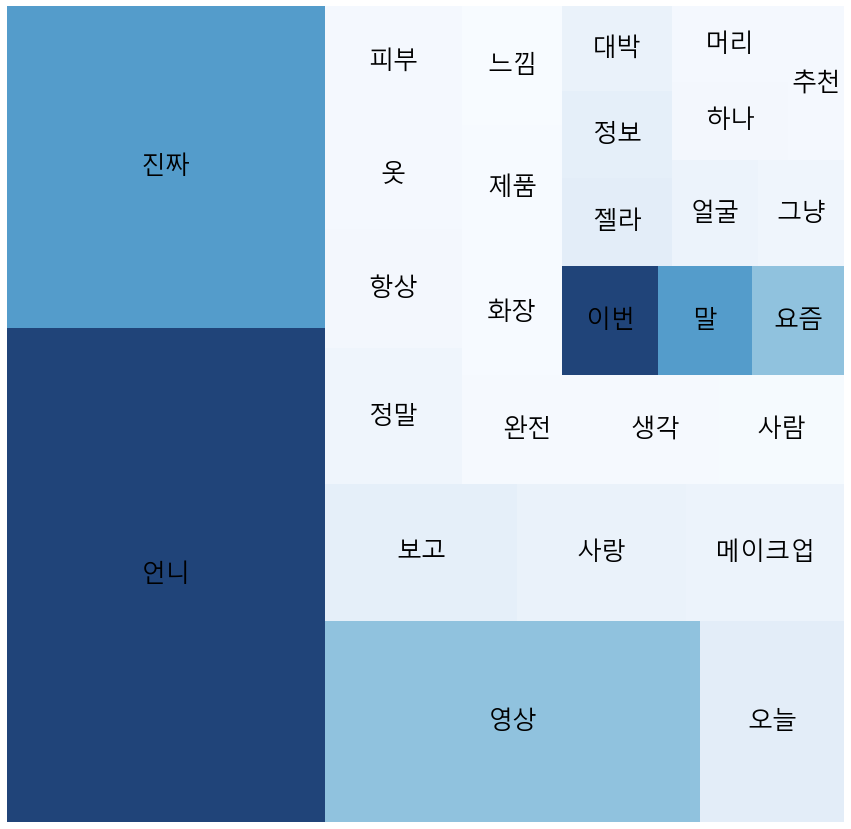

In [15]:
squarify.plot(sizes=values, label=keys, alpha=.9,color = colors)
plt.axis('off')
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 15)
plt.show()
plt.rc('font',size=25)

In [2]:
a= {'언니': 7444, '진짜': 4846, '영상': 3579,  '오늘': 1370, '보고': 1250, '사랑': 1098, '메이크업': 1025, '정말': 881, '항상': 772, '옷': 728, '피부': 720, '완전': 676, '생각': 651, '사람': 647, '화장': 600, '제품': 597, '느낌': 567, '이번': 495, '말': 485, '요즘': 478,'젤라': 458, '정보': 450, '대박': 440, '얼굴': 436, '그냥': 433,  '하나': 430, '머리': 419,'추천': 409}

In [3]:
values = a.values()
values

dict_values([7444, 4846, 3579, 1370, 1250, 1098, 1025, 881, 772, 728, 720, 676, 651, 647, 600, 597, 567, 495, 485, 478, 458, 450, 440, 436, 433, 430, 419, 409])

In [4]:
keys = a.keys()
keys

dict_keys(['언니', '진짜', '영상', '오늘', '보고', '사랑', '메이크업', '정말', '항상', '옷', '피부', '완전', '생각', '사람', '화장', '제품', '느낌', '이번', '말', '요즘', '젤라', '정보', '대박', '얼굴', '그냥', '하나', '머리', '추천'])

In [6]:
data = pd.DataFrame({'키워드':aa,'빈도수':bb})

In [5]:
aa=  list(keys)
bb = list(values)

In [10]:

dataGoals= data[data['빈도수']>500]
norm = mpl.colors.Normalize(vmin=min(dataGoals.빈도수), vmax=max(dataGoals.빈도수))
colors =  [mpl.cm.Blues(norm(value)) for value in dataGoals.빈도수]

In [14]:
norm = mpl.colors.Normalize(vmin=min(dataGoals.G), vmax=max(dataGoals.G))

AttributeError: 'DataFrame' object has no attribute 'G'

## 여기부터 Word_To_Vector시작

In [2]:
df = pd.read_csv('IT리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword_IT.csv', index = False)
    

In [3]:
comment_data = pd.read_csv('testword_IT.csv')
comment_data

,닉네임,댓글,좋아요수,날짜
0,권현수,윈도우 홈피에서 '지금 업데이트'와 도구 다운로드 후 팝업창에서 나오는 ' 이 PC...,2개,2020. 6. 2.
1,OwenOh,설치 usb로 만들면 그 버전도 최신 2004 버전으로 만들어지는건가요? 아님 업데...,0개,2020. 6. 2.
2,cota,왜 업데이트가 안 될까 했는데 툴이 필요했군요. \n아직은 IE로 페이지사 열리는 ...,2개,2020. 6. 2.
3,luckyclassic,코타나 버튼 생겨서 한국어 지원하는줄 알았는데 그냥 버튼만 생긴거였네요ㅠㅠ,0개,2020. 6. 2.
4,조범준,참 잘나왔는데 skt한정으로만 나온게 너무나도 아쉬운 모델...,4개,2020. 5. 13.
...,...,...,...,...
22748,윤지용,영태형 비데 공구는 다시 없나요,0개,2020. 4. 6.
22749,ChanP,화면전환이 전보다는 조금 줄어들긴 했지만 여전히 정신 없어요 ㅠ 화면전환이 많으면 ...,0개,2020. 4. 6.
22750,이영선,영태형 안망하는거죠\n오래보고싶어요,0개,2020. 4. 6.
22751,키키짱,이번 리뷰에는 없지만 샤오미 구강세정기와 초음파 세척기 가지고 있어요. 강추합니다....,0개,2020. 4. 6.


In [4]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [5]:
# 댓글만 출력해서 리스트에 저장
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['댓글'].iloc[i])
comment_result = []

# 토큰작업
for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

# 댓글중에서 명사인 단어만 추출하는 함수생성
def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i) #명사인 단어만 추출
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
comment_result.head()

C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


,comment,token
0,윈도우 홈피에서 '지금 업데이트'와 도구 다운로드 후 팝업창에서 나오는 ' 이 PC...,"[윈도우, 홈피, 지금, 업데이트, 도구, 다운로드, 후, 팝업창, 이, 를, 업그..."
1,설치 usb로 만들면 그 버전도 최신 2004 버전으로 만들어지는건가요 아님 업데이...,"[설치, 로, 그, 버전, 최신, 버전, 가요, 업데이트, 버전, 가요, 현재, 제..."
2,왜 업데이트가 안 될까 했는데 툴이 필요했군요 아직은 IE로 페이지사 열리는 경우가...,"[왜, 업데이트, 안, 툴, 은, 로, 페이, 지사, 경우, 엣지, 구글드라이브, ..."
3,코타나 버튼 생겨서 한국어 지원하는줄 알았는데 그냥 버튼만 생긴거였네요,"[코타, 버튼, 한국어, 지원, 그냥, 버튼]"
4,참 잘나왔는데 skt한정으로만 나온게 너무나도 아쉬운 모델,"[한정, 모델]"


In [6]:
# Vec화 작업
vec = []
for i in range(len(comment_result)):
    vec2 = []
    tm_ls = comment_result['token'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)
vec

[['윈도우', '홈피', '지금', '업데이트', '도구', '다운로드', '팝업창', '업그레이드', '차이점'],
 ['설치',
  '버전',
  '최신',
  '버전',
  '가요',
  '업데이트',
  '버전',
  '가요',
  '현재',
  '설치',
  '버전',
  '그것',
  '최신',
  '버전'],
 ['업데이트',
  '페이',
  '지사',
  '경우',
  '엣지',
  '구글드라이브',
  '용량',
  '영상',
  '파일',
  '아주',
  '크롬',
  '달리',
  '업로드',
  '마무리',
  '다시',
  '시작',
  '업데이트',
  '개선',
  '제일',
  '수도'],
 ['코타', '버튼', '한국어', '지원', '그냥', '버튼'],
 ['한정', '모델'],
 ['혹시', '퀀텀', '강화유리', '리뷰', '가요'],
 ['자급'],
 ['타로', '화면', '영상'],
 ['혹시'],
 ['보안', '강화', '모델', '면서', '실사', '과정', '다만', '정말'],
 ['퀀텀', '이름', '우리나라', '보안', '칩셋', '추가'],
 ['무선', '충전', '방수', '방진', '패스'],
 ['배경음악'],
 ['요새', '가폰', '메인', '차이', '별로'],
 ['갤럭시', '퀀텀', '보안', '위협', '보안', '혁신', '생각'],
 ['지법', '뭔가', '발동'],
 ['그냥', '자급', '제라'],
 ['크기', '좀더'],
 ['통신', '보안', '프로그램', '암호', '데이터', '강제', '추출'],
 ['요금', '제만'],
 ['양자',
  '보안',
  '기술',
  '일부',
  '기능',
  '발동',
  '다른',
  '작업',
  '삼성',
  '녹스',
  '안드로이드',
  '샌드박스',
  '의존',
  '사실',
  '실패',
  '아이디어',
  '방식',
  '달라',
  '취약'],
 ['씨디', '리뷰', '일루', '선셋

## word2vec
- 중심단어와 주변단어 벡터의 내적이 코사인 유사도가 되도록 단어를 벡터
    공간에 임베딩(배치) 한다.

- min_count  = 몇 이하로 등장하는 단어 제외
- workers = 몇코어 쓸건지
- iter = 몇번 학습하라는건지
- window =  주변의 단어를 몇개로 볼것인지 
- size = 몇차원으로 할것인지 
- 학습 차원의 크기
일반적으로 100-300을 사용한다. 최소한의 정확도를 얻기 위해서는 50차원 이상은 사용해야한다고 생각한다. 만약 적은 차원을 선택하면 많은 차원에서 얻을 수 있는 특성들을 잃게될 수 있다. 훈련시간이 크게 중요하지 않다면 200차원을 권한다. 최상의 정확도는 300차원에서 얻어진다. 300차원 이상이면 학습시간이 늘어나는 것에 비해서 얻어지는 향상은 미미하다.

In [7]:
model = Word2Vec(vec, min_count=10,window=6,iter=50, size=200, sg=1) #skip-gram

model.wv.syn0.shape #w2v size  -> 45개의 단어가 200차원을 가지고 있음

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(1693, 200)

In [8]:
#45개의 단어가 200차원으로 벡터화된 수치를 넣어줌
word_vectors = model.wv.syn0 # model.wv.vectors와 같은 값을 가짐
word_vectors

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


array([[-0.00074854,  0.26282978,  0.45566377, ..., -0.05394634,
         0.10587042,  0.09536416],
       [ 0.54615635, -0.11760239,  0.32902753, ...,  0.00773853,
        -0.14281456,  0.11257779],
       [-0.09776734,  0.07172029, -0.03951255, ...,  0.07122423,
        -0.23710962, -0.04703211],
       ...,
       [-0.12960827, -0.04355733,  0.01447977, ...,  0.39886054,
        -0.03749514,  0.01608958],
       [ 0.1618641 ,  0.34329778, -0.35288525, ..., -0.02241052,
        -0.04746927, -0.06961648],
       [-0.00592769,  0.02876071,  0.1810827 , ...,  0.09892049,
        -0.01209091, -0.15708315]], dtype=float32)

In [9]:
num_clusters = 6 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default
idx = kmeans_clustering.fit_predict( word_vectors ) #각 단어가 어떤 군집에 속하는지 확인
idx

array([0, 0, 0, ..., 3, 3, 4])

In [10]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word #학습된 단어들 unique
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}#각 단어 별로 클러스터 번호에 매칭
print(names)

['영상', '진짜', '리뷰', '아이폰', '가격', '사용', '보고', '생각', '제품', '오늘', '인트', '보드', '성능', '정말', '애플', '벨벳', '그냥', '삼성', '항상', '역시', '정도', '디자인', '사람', '프로', '세대', '때문', '구매', '이번', '하나', '노트북', '정보', '카메라', '기능', '지금', '게임', '비교', '배터리', '인텔', '엘지', '갤럭시', '리안', '이제', '요즘', '인치', '추천', '아이패드', '고민', '혹시', '가성', '가요', '산다', '케이스', '화면', '차이', '느낌', '한번', '모델', '처음', '공기청정기', '다른', '맥북', '다이슨', '문제', '바로', '댓글', '오버', '오케이', '출시', '노트', '소리', '설명', '컴퓨터', '다시', '다음', '구독', '성조', '계속', '스피커', '업데이트', '부분', '유튜브', '이유', '지원', '인트로', '최고', '에어', '건가', '라이', '뭔가', '조금', '누나', '가지', '이상', '방구', '민성', '스마트폰', '광고', '존버', '코어', '매력', '두목', '충전', '인식', '기본', '구석', '대박', '이건', '시간', '마스크', '완전', '독자', '기대', '이어폰', '거의', '편집', '작업', '테스트', '경우', '가장', '무선', '모니터', '예전', '방법', '제일', '마음', '구입', '형님', '사랑', '얼마나', '언제', '우리', '감사', '레드', '얼마', '축하', '사고', '핸드폰', '나비', '별로', '짝퉁', '개인', '제발', '목소리', '친구', '시리즈', '프레임', '추가', '설정', '채널', '마우스', '버전', '유저', '시작', '기기', '여기', '렌즈', '네이버', '촬영', '점점', '게이', '도움', 

In [11]:
for cluster in range(0,6):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['영상', '진짜', '리뷰', '보고', '오늘', '인트', '정말', '항상', '역시', '정보', '리안', '이제', '요즘', '한번', '처음', '댓글', '오케이', '설명', '다시', '구독', '계속', '인트로', '최고', '뭔가', '누나', '방구', '민성', '광고', '매력', '두목', '대박', '시간', '완전', '독자', '기대', '이어폰', '편집', '예전', '사랑', '우리', '감사', '레드', '축하', '나비', '목소리', '채널', '시작', '렌즈', '점점', '도움', '보기', '화이팅', '이벤트', '얼굴', '고생', '꿀팁', '덕분', '응원', '썸네일', '잇츠', '관심', '유튜버', '언니', '소식', '컨텐츠', '서울', '유선', '나중', '혁키', '조명', '무엇', '기분', '옛날', '코로나', '라이브', '중간', '누가', '갑자기', '마지막', '당첨', '만능', '소개', '볼때', '와우', '모습', '안경', '코드', '엠알님', '혁키님', '맛집', '감상', '오프닝', '감성', '추억', '다행', '하루', '벌써', '엄마', '발전', '웃기', '말방규', '방송', '남자', '자꾸', '지메일', '연기', '진심', '자막', '노래', '수가', '제목', '머리', '이형', '테크', '티셔츠', '신성', '기회', '건강', '이군', '역대', '아아', '인정', '살짝', '쏙쏙', '미리', '센스', '하트', '준비', '몇번', '영상편집', '해주시', '가즈', '보시', '퀄리티', '장비', '이분', '재미', '전자기기', '선물', '브로', '저기', '홍보', '가용', '케이', '컨셉', '레전드', '매일', '상이', '메일', '저희', '갈수록', '듣기', '제작', '아이디어', '전자', '여자', '당신', '와중', '장인', '언박싱'

In [12]:
words

['아이폰',
 '애플',
 '벨벳',
 '삼성',
 '디자인',
 '하나',
 '카메라',
 '기능',
 '배터리',
 '엘지',
 '갤럭시',
 '화면',
 '느낌',
 '다른',
 '노트',
 '소리',
 '스피커',
 '업데이트',
 '부분',
 '지원',
 '조금',
 '스마트폰',
 '충전',
 '인식',
 '무선',
 '제일',
 '마음',
 '핸드폰',
 '짝퉁',
 '시리즈',
 '버전',
 '기기',
 '촬영',
 '모드',
 '사진',
 '티비',
 '안드로이드',
 '디스플레이',
 '장점',
 '색상',
 '용량',
 '단점',
 '워치',
 '버튼',
 '보급',
 '사운드',
 '태블릿',
 '라이트',
 '이름',
 '크기',
 '원래',
 '스크린',
 '사용자',
 '자체',
 '차라리',
 '무조건',
 '무슨',
 '마이크',
 '듀얼',
 '휴대폰',
 '중국',
 '그거',
 '일반',
 '화질',
 '베젤',
 '녹음',
 '쓰기',
 '플래그',
 '연결',
 '터치',
 '카드',
 '거기',
 '충전기',
 '적용',
 '페이',
 '페이스',
 '무게',
 '샤오미',
 '패드',
 '최적화',
 '크게',
 '구글',
 '스마트',
 '약간',
 '처럼',
 '모두',
 '지문',
 '기존',
 '최대',
 '보이',
 '울트라',
 '현재',
 '대한',
 '액정',
 '블루투스',
 '블랙',
 '통화',
 '폴더',
 '패널',
 '소프트웨어',
 '대체',
 '가능',
 '기계',
 '블루',
 '아래',
 '색깔',
 '베가',
 '방식',
 '초기',
 '대신',
 '개선',
 '전면',
 '포트',
 '사과',
 '만약',
 '최근',
 '내장',
 '로고',
 '보안',
 '노치',
 '보스',
 '전부',
 '탑재',
 '박스',
 '전원',
 '실망',
 '메인',
 '조절',
 '방수',
 '쓰레기',
 '기업',
 '색감',
 '단자',
 '최신',
 '금제',
 '입장',
 '펀치',
 

In [13]:
# 현재 작업하는 클러스터의 모델명 지정 및 저장
model_name = 'Beaut_M_10W_6'
model.save(model_name)

mpl.rcParams['axes.unicode_minus'] = False
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

1693
[ 0.04671257 -0.29330188  0.36007586  0.5000033   0.1728026  -0.01895967
  0.5518517  -0.38951236 -0.60131407 -0.11637925]


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [14]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [15]:
df

,x,y
윈도우,44.470680,91.476097
지금,-26.906500,36.745564
업데이트,-126.462227,-69.482651
도구,29.112673,36.711998
다운로드,38.398403,55.253239
...,...,...
보고,-19.141907,-5.427667
컨셉,-79.581413,45.337685
일체,-19.579990,112.641479
관심,56.755657,-115.356567


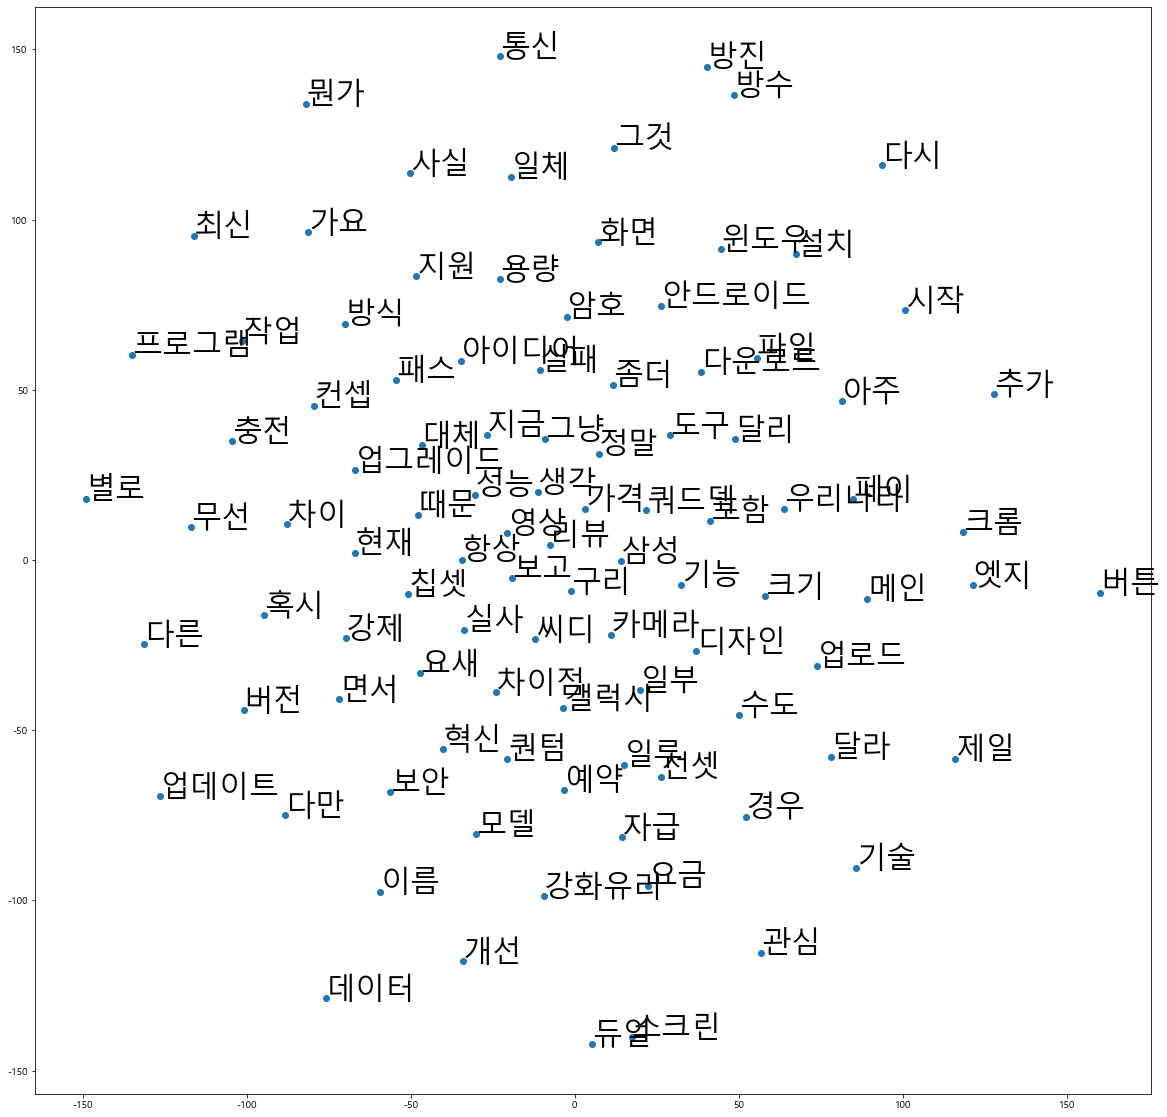

In [16]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [17]:
# 150개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [18]:
df.head(10)

,x,y
윈도우,-18.016823,-86.482239
지금,-21.932318,-41.118500
업데이트,-137.721375,5.629502
도구,2.895757,-32.277939
다운로드,7.238663,-45.787769
업그레이드,-73.593056,45.554241
차이점,41.936172,-36.012459
설치,-31.371130,-100.435387
버전,85.219521,-67.808823
최신,48.626431,-73.989243


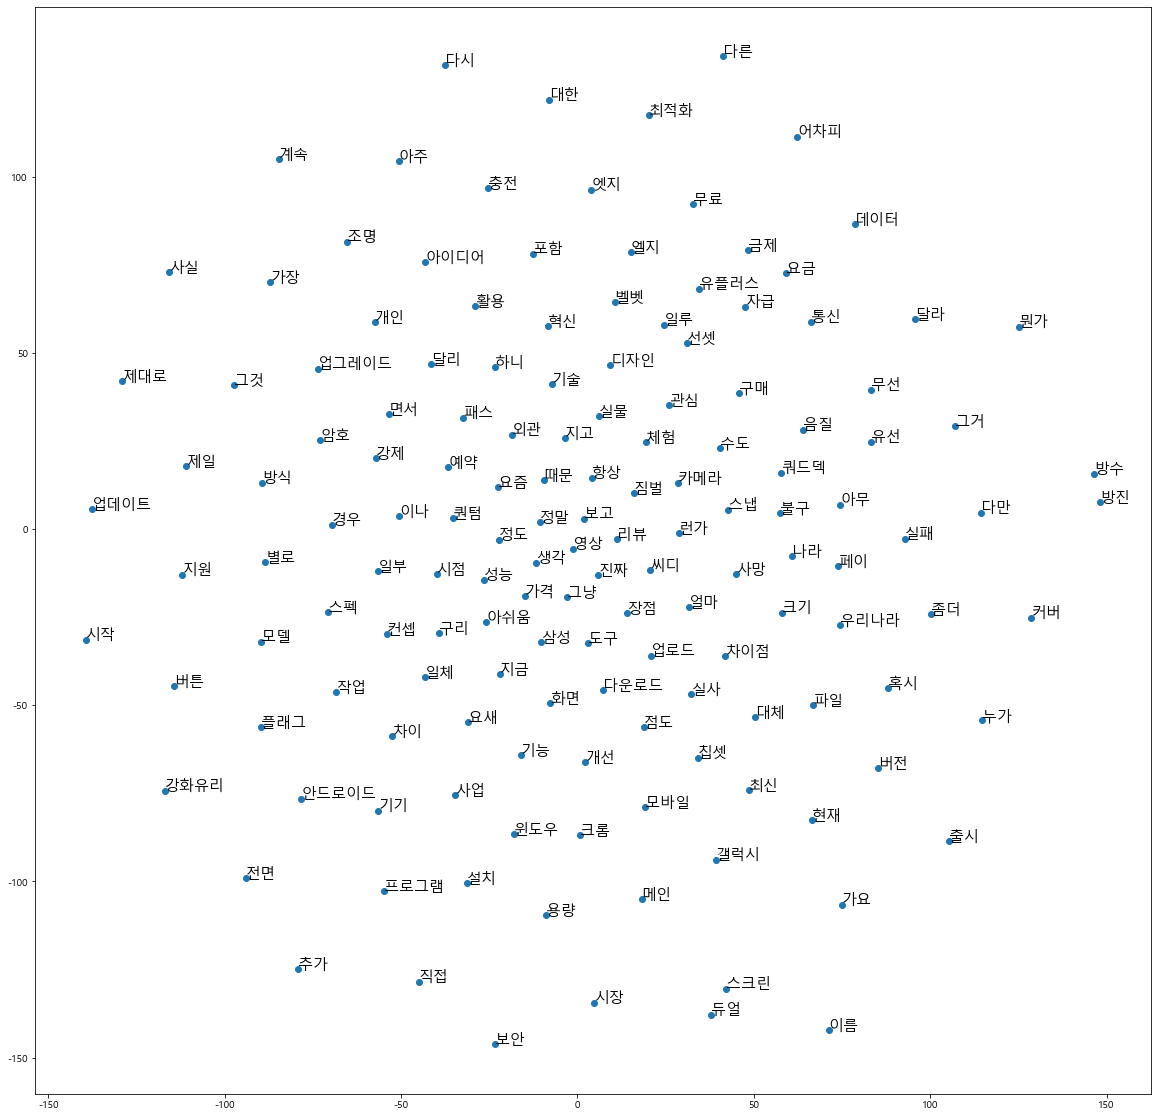

In [19]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()

In [20]:
model.most_similar('벨벳')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('물방울', 0.41694754362106323),
 ('일루', 0.4143184423446655),
 ('선셋', 0.3953391909599304),
 ('엘지', 0.3942118287086487),
 ('용기', 0.37726759910583496),
 ('지메일', 0.36972713470458984),
 ('노치', 0.36822476983070374),
 ('유출', 0.3607909083366394),
 ('듀마레', 0.3533651530742645),
 ('네이비', 0.34872138500213623)]

In [21]:
model.most_similar('코로나')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('바이러스', 0.4936356544494629),
 ('평일', 0.3668171763420105),
 ('시기', 0.34689241647720337),
 ('엠알', 0.34481358528137207),
 ('비염', 0.3342677354812622),
 ('노래방', 0.32560884952545166),
 ('군대', 0.32496190071105957),
 ('당첨', 0.32439908385276794),
 ('덕트', 0.3239538371562958),
 ('시점', 0.32300078868865967)]

In [28]:
model.most_similar('벨벳')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('물방울', 0.41694754362106323),
 ('일루', 0.4143184423446655),
 ('선셋', 0.3953391909599304),
 ('엘지', 0.3942118287086487),
 ('용기', 0.37726759910583496),
 ('지메일', 0.36972713470458984),
 ('노치', 0.36822476983070374),
 ('유출', 0.3607909083366394),
 ('듀마레', 0.3533651530742645),
 ('네이비', 0.34872138500213623)]

In [34]:
print(model.most_similar(positive = ["제품","엘지"])[5])
print(model.most_similar(positive = ["벨벳","엘지"])[7])

('중국산', 0.34781497716903687)
('고문', 0.3698788583278656)


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [56]:
model.most_similar(positive = ["벨벳","성능"])

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('일루', 0.3943178653717041),
 ('바이오', 0.3916250467300415),
 ('쓰레드', 0.39081525802612305),
 ('경쟁력', 0.3837761878967285),
 ('팀킬', 0.37669479846954346),
 ('스냅드래곤', 0.37402504682540894),
 ('매스', 0.37243273854255676),
 ('선셋', 0.3647623360157013),
 ('지메일', 0.36431169509887695),
 ('실물', 0.3625694811344147)]

In [22]:
model.similarity('코로나', '제품')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.18997702

In [ ]:
# 현재 작업하는 클러스터의 모델명 지정 및 저장
model_name = 'Beaut_M_10W_6'
model.save(model_name)

mpl.rcParams['axes.unicode_minus'] = False
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=3)

In [ ]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:1693,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:1693], columns=['x', 'y','z'])
df.shape
df

In [ ]:
from sklearn.datasets import make_swiss_roll
from plotly.offline import plot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# X, t = make_swiss_roll(n_samples=1000, noise=0)
# color = (t - t.min()) / (t.max() - t.min())

In [ ]:
df_list = list(df.index)
df_list

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0)
color = (t - t.min()) / (t.max() - t.min())

In [ ]:
data = go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    text = df_list,
    mode='markers',
   
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

In [ ]:
fig = go.Figure(data=[data], layout=layout)
# iplot(fig)

In [ ]:
from plotly.offline import plot
plot(fig, filename='plotly-3d-scatter-small_4.html', auto_open=True)

In [ ]:
fig = go.Figure(data=[data1, data2, data3], layout=layout)
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)

# ax.scatter(df['x'], df['y'],df['z'])
plotly
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import csv
from os import listdir
from os.path import isfile, join

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

handles = []
colors = ['blue', 'red']

X1 = cluster 0
Y1 = list(range(10))
Z1 = list(range(10))

random.shuffle(X1)
random.shuffle(Y1)
random.shuffle(Z1)

scatter1 = ax.scatter(X1, Y1, Z1, c = colors[0], marker = 'o')

random.shuffle(X1)
random.shuffle(Y1)
random.shuffle(Z1)

scatter2 = ax.scatter(X1, Y1, Z1, c = colors[1], marker = 'v')

ax.set_xlabel('X', fontsize = 10)
ax.set_ylabel('Y', fontsize = 10)
ax.set_zlabel('Z', fontsize = 10)

ax.legend([scatter1, scatter2], ['label1', 'label2'])

plt.show()

In [ ]:
scatter1_proxy = mpl.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = mpl.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
ax.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)

In [ ]:
scatter1_proxy

In [ ]:
scatter2_proxy

In [ ]:
ax